In [2]:
import utilities as util
import preprocessor as prep
import plotter as myPlotter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import pandas as pd
from sklearn.metrics import roc_curve, auc




<h1> Classifying Severe Weather Events

This part will focus on the comparison on several calssifiers which use the data to create a predicition for each row in the dataset. 

In [3]:
t = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')

In [7]:
"""

This functions evaluate the data given a certain set of selected features with multiple classifiers.
Here in this context they are:LogisticRegression,SVC, RandomForestClassifier,
GradientBoostingClassifier,DecisionTreeClassifier and an AdaBoostClassifier.
all classifiers are later compared and a report is geiven with the results.
"""



def get_report(animal):
    # Assuming your DataFrame is named "animal"
    selected_columns = ['longitude', 'latitude', 'year', 'depth',
                        'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                        'Dist from Feeding Spot (km)', 'severe weather event']

    selected_df = animal[selected_columns]
    selected_df.dropna(inplace=True)

    X = selected_df.iloc[:, :-1]
    y = selected_df.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

    #  the classifiers
    classifiers = [
        LogisticRegression(),
        SVC(kernel='linear'),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        AdaBoostClassifier()

    ]
    results = {}
    
    for classifier in classifiers:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        confidence = 0.95
        n = len(y_test)
        z = stats.norm.ppf((1 + confidence) / 2)

        accuracy_interval = z * np.sqrt((accuracy * (1 - accuracy)) / n)
        precision_interval = z * np.sqrt((precision * (1 - precision)) / n)
        recall_interval = z * np.sqrt((recall * (1 - recall)) / n)
        f1_interval = z * np.sqrt((f1 * (1 - f1)) / n)

        results[type(classifier).__name__] = {
            'Accuracy': accuracy,
            'Accuracy Interval': accuracy_interval,
            'Precision': precision,
            'Precision Interval': precision_interval,
            'Recall': recall,
            'Recall Interval': recall_interval,
            'F1-Score': f1,
            'F1-Score Interval': f1_interval
        }

    evaluation_df = pd.DataFrame.from_dict(results, orient='index')

    print("Evaluation Report:")
    print(evaluation_df)
    return evaluation_df

eval_report = get_report(t)

C:\Users\Ben\AppData\Local\Temp\ipykernel_10352\1432787966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


Evaluation Report:
                            Accuracy  Accuracy Interval  Precision  \
LogisticRegression          0.708892           0.031074   0.619718   
SVC                         0.756395           0.029363   0.666667   
RandomForestClassifier      0.922046           0.018339   0.920415   
GradientBoostingClassifier  0.839220           0.025126   0.798635   
DecisionTreeClassifier      0.874543           0.022658   0.835526   
AdaBoostClassifier          0.797808           0.027473   0.723810   

                            Precision Interval    Recall  Recall Interval  \
LogisticRegression                    0.033207  0.573290         0.033832   
SVC                                   0.032246  0.697068         0.031433   
RandomForestClassifier                0.018513  0.866450         0.023269   
GradientBoostingClassifier            0.027431  0.762215         0.029121   
DecisionTreeClassifier                0.025357  0.827362         0.025852   
AdaBoostClassifier          

<!-- # selected_columns = ['longitude', 'latitude', 'year', 'depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# Accuracy: 0.713764
# Precision: 0.593156
# Recall: 0.549296
# F1-Score: 0.570384


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.738124
# 1  Precision  0.640816
# 2     Recall  0.552817
# 3   F1-Score  0.593573


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'severe weather event']
# 0   Accuracy  0.660171
# 1  Precision  0.857143
# 2     Recall  0.021127
# 3   F1-Score  0.041237

# selected_columns = ['depth',
#                     'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.736906
# 1  Precision  0.644068
# 2     Recall  0.535211
# 3   F1-Score  0.584615

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','Barometric Pressure',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','depth',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226


# selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 
#                     'severe weather event' ]
# Evaluation Report:
#       Metric     Score  Confidence Interval
# 0   Accuracy  0.714982             0.030879
# 1  Precision  0.644269             0.032747
# 2     Recall  0.530945             0.034136
# 3   F1-Score  0.582143             0.033737


# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)',
#                     'Wind Gust (kn)', 
#                     'severe weather event' ]
# Evaluation Report:
#       Metric     Score  Confidence Interval
# 0   Accuracy  0.708892             0.031074
# 1  Precision  0.619718             0.033207
# 2     Recall  0.573290             0.033832
# 3   F1-Score  0.595601             0.033571

# selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
#                    'severe weather event' ]
# 0   Accuracy  0.716895             0.034448
# 1  Precision  0.611940             0.037262
# 2     Recall  0.532468             0.038152
# 3   F1-Score  0.569444             0.037862 -->

C:\Users\Ben\AppData\Local\Temp\ipykernel_10352\696065873.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  evaluation_df = evaluation[{'Precision','Accuracy','Recall','F1-Score'}]


df_melted         index            variable     value
0  Precision  LogisticRegression  0.619718
1   Accuracy  LogisticRegression  0.708892
2   F1-Score  LogisticRegression  0.595601
3     Recall  LogisticRegression  0.573290
4  Precision                 SVC  0.666667


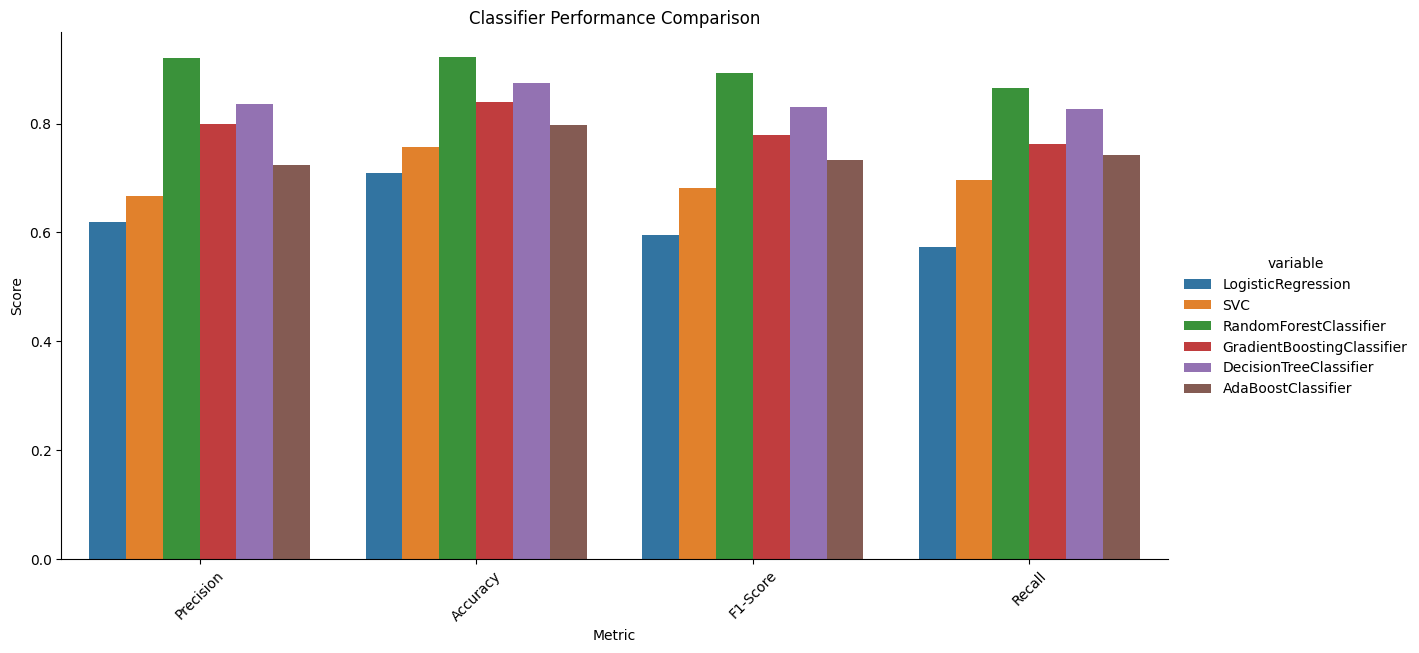

In [8]:
import seaborn as sns

def visualize_comparison(evaluation):
    # Transpose the dataframe, reset index, and melt to have metrics in single column
    evaluation_df = evaluation[{'Precision','Accuracy','Recall','F1-Score'}]
    # evaluation_df = evaluation[{'F1-Score','Accuracy'}]
    df_melted = evaluation_df.transpose().reset_index().melt(id_vars='index')
    print('df_melted ', df_melted.head())
    # Create the grouped bar plot
    sns.catplot(x='index', y='value', hue='variable', data=df_melted, kind='bar', height=6, aspect=2)

    # Set the labels and title
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Classifier Performance Comparison')
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Call the visualize_comparison function with the evaluation DataFrame
visualize_comparison(eval_report)



C:\Users\Ben\AppData\Local\Temp\ipykernel_36664\97785708.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  evaluation_df = evaluation[{'Precision','Accuracy','Recall','F1-Score'}]


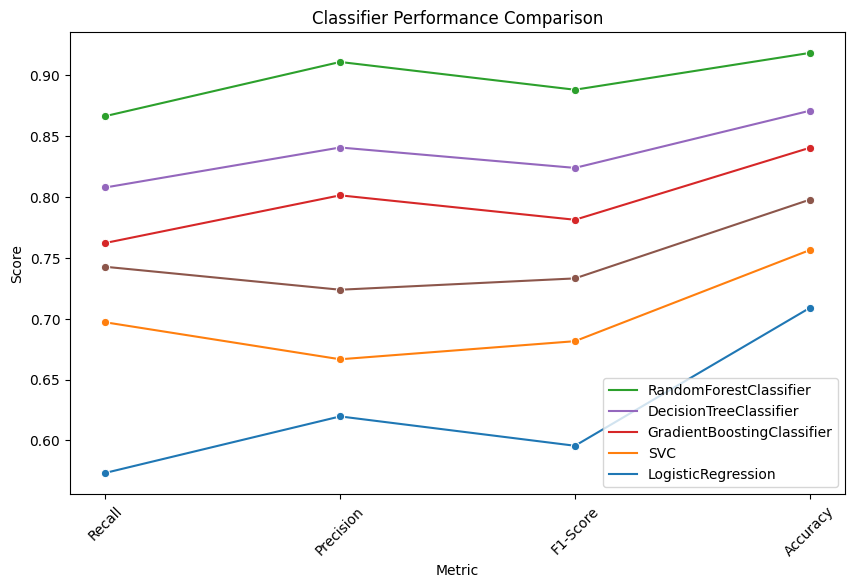

In [37]:
def visualize_comparison_line(evaluation):
    evaluation_df = evaluation[{'Precision','Accuracy','Recall','F1-Score'}]

    # Transpose the dataframe, reset index, and melt to have metrics in single column
    df_melted = evaluation_df.transpose().reset_index().melt(id_vars='index')

    # Create the line plot
    plt.figure(figsize=(10,6))
    sns.lineplot(x='index', y='value', hue='variable', data=df_melted, marker='o')

    # Set the labels and title
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Classifier Performance Comparison')
    plt.xticks(rotation=45)


    # Order the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [2,4,3,1,0]  # order of legend labels
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

    # Show the plot
    plt.show()

# Call the visualize_comparison function with the evaluation DataFrame
visualize_comparison_line(eval_report)


<h1> Logistic Regression

In [3]:
tiger_sharks_data = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')

selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
                    'severe weather event']

# Select the columns of interest from the DataFrame
selected_df = tiger_sharks_data[selected_columns]
print('size before cleanup: ', selected_df.shape)
selected_df = selected_df.replace('-', np.nan)
selected_df.dropna(subset = selected_columns, inplace=True)
print('size after cleanup: ', selected_df.shape)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


size before cleanup:  (5772, 8)
size after cleanup:  (3283, 8)


<h1>Support Vector Machine

In [4]:
tiger_sharks_data = prep.preprocess_4_LR('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')
selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
                    'severe weather event']

# Select the columns of interest from the DataFrame
selected_df = tiger_sharks_data[selected_columns]
print('size before cleanup: ', selected_df.shape)
selected_df = selected_df.replace('-', np.nan)
selected_df.dropna(subset = selected_columns, inplace=True)
print('size after cleanup: ', selected_df.shape)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

size before cleanup:  (5772, 8)
size after cleanup:  (3283, 8)


c:\Users\Ben\Documents\GitHub\Animal-Motion-for-predictions\src\utilities.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.dropna(inplace=True)


Evaluation Report:
      Metric     Score  Confidence Interval
0   Accuracy  0.708892             0.031074
1  Precision  0.619718             0.033207
2     Recall  0.573290             0.033832
3   F1-Score  0.595601             0.033571


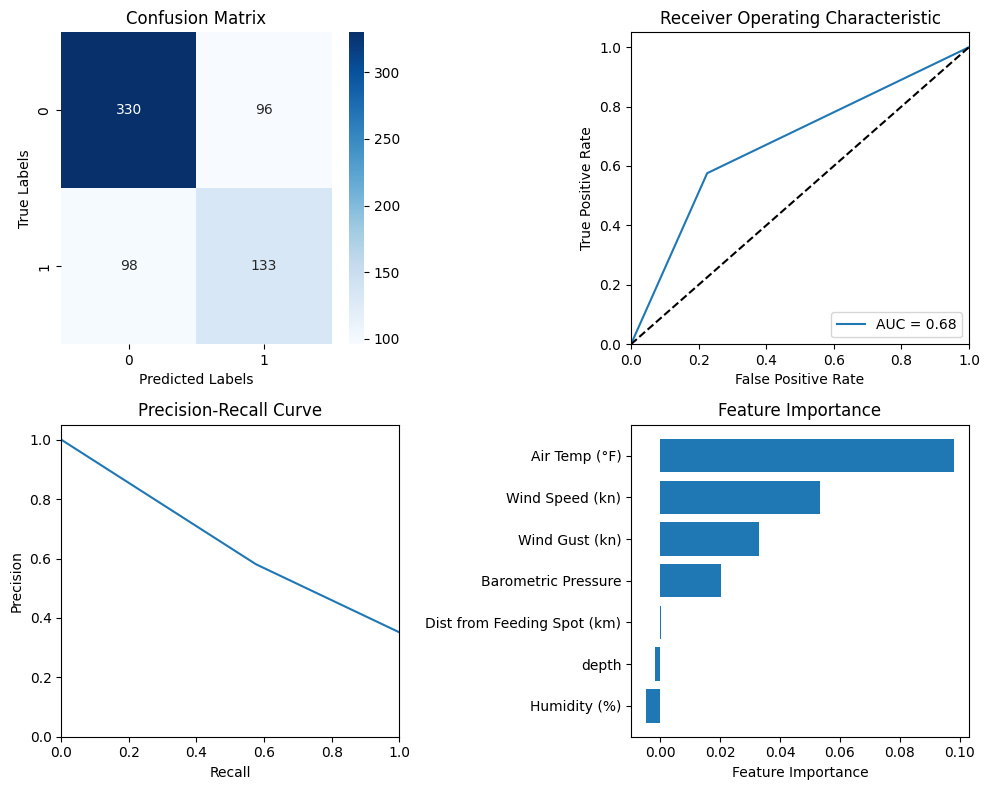

In [5]:
util.get_LR_report(tiger_sharks_data)
myPlotter.plot_model_Evaluation(model,y_test,y_pred,X_test,X)